In [1]:
import pandas as pd
import numpy as np

# Первичный анализ данных

Рассмотрим данные о дорожных происшествиях во Франции в период с 2005 до 2016 годы <br>
https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016

Данные состоят из нескольких таблиц:
1. о самих происшествиях (characteristics), <br> 
2. о месте, где произошло (places), <br>
3. о людях, вовлеченных в аварию (users) <br>
4. о машинах, задействованных в аварии (vehicles) <br>
5. данные о праздничных днях во Франции <br>
     
Таблица о машинах представляет небольшой интерес, ее использовать не будем. В основном будем работать с таблицей characteristics
Основные поля таблицы characteristics:
1. $Num$_$Acc$ - номер происшествия
2. $an$ - год
3. $mois$ - месяц
4. $jour$ - день
5. $hrmn$ - время часы:минуты
6. $lum$ - условия освещенности (ситуации занумерованы)
7. $atm$ - атмосферные условия
8. $col$ - тип столкновения
9. $dep$ - код департамента
10. $com$ - код муниципитета
11. Координатные данные $gps, long, lat, adr, agg$

### План исследования:
1. Убрать лишние поля, переименовать столбцы в более понятные, соединить некоторые таблицы в одну по номеру просшествия
2. Построить графики зависимости числа происшествий относительно дорожных и временных условий, попытаться выявить закономерности
3. На основе наблюдений сформулировать статистические гипотезы и проверить их
4. Построить временной ряд (количество происшествий за каждый день), проверить его на стационарность и сделать предсказание на последний год

In [2]:
df_charact = pd.read_csv('accidents-in-france-from-2005-to-2016/caracteristics.csv', low_memory = False, encoding = 'latin-1')

In [3]:
df_charact.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


In [4]:
df_charact.describe()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,lat,dep
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839930.000000,839974.000000,839983.000000,3.624710e+05,839985.000000
mean,2.010011e+11,10.011129,6.679437,15.594687,1381.093505,1.912588,1.685924,1.694066,1.547116,4.187484,186.510172,2.849715e+06,564.257671
std,3.458009e+08,3.458059,3.389489,8.750201,540.757462,1.517900,0.464147,1.510792,1.587668,1.974998,171.873105,2.284591e+06,291.153083
min,2.005000e+11,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,10.000000
25%,2.007000e+11,7.000000,4.000000,8.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,3.000000,55.000000,0.000000e+00,310.000000
50%,2.010000e+11,10.000000,7.000000,15.000000,1446.000000,1.000000,2.000000,1.000000,1.000000,3.000000,118.000000,4.370200e+06,630.000000
75%,2.013000e+11,13.000000,10.000000,23.000000,1810.000000,3.000000,2.000000,2.000000,1.000000,6.000000,278.000000,4.799218e+06,780.000000
max,2.016001e+11,16.000000,12.000000,31.000000,2359.000000,5.000000,2.000000,9.000000,9.000000,7.000000,987.000000,5.564823e+06,976.000000


In [5]:
df_charact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 16 columns):
Num_Acc    839985 non-null int64
an         839985 non-null int64
mois       839985 non-null int64
jour       839985 non-null int64
hrmn       839985 non-null int64
lum        839985 non-null int64
agg        839985 non-null int64
int        839985 non-null int64
atm        839930 non-null float64
col        839974 non-null float64
com        839983 non-null float64
adr        699443 non-null object
gps        366226 non-null object
lat        362471 non-null float64
long       362467 non-null object
dep        839985 non-null int64
dtypes: float64(4), int64(9), object(3)
memory usage: 102.5+ MB


- $dep, com$ - в каком департаменте, муниципалитете произошло - не нужно <br>
- $col$ - тип столкновения - пока оставим<br>
- $gps, long, lat, agg, adr$ - координатные переменные (много nan, выкидываем)

In [6]:
df_charact.drop(['dep', 'com', 'col', 'gps', 'lat', 'long', 'agg', 'adr'], axis=1, inplace=True)
df_charact

,Num_Acc,an,mois,jour,hrmn,lum,int,atm
0,201600000001,16,2,1,1445,1,1,8.0
1,201600000002,16,3,16,1800,1,6,1.0
2,201600000003,16,7,13,1900,1,1,1.0
3,201600000004,16,8,15,1930,2,1,7.0
4,201600000005,16,12,23,1100,1,3,1.0
...,...,...,...,...,...,...,...,...
839980,200500087950,5,12,21,2035,5,2,1.0
839981,200500087951,5,12,23,1010,1,1,1.0
839982,200500087952,5,12,26,1715,1,2,1.0
839983,200500087953,5,12,27,1500,1,3,2.0


Переименуем столбцы с французского

In [7]:
rname = {
    'Num_Acc': 'ID',
    'jour': 'Day',
    'mois': 'Month',
    'an': 'Year',
    'hrmn': 'Hour',
    'lum': 'Light_Conditions',
    'grav': 'Accident_Severity',
    'atm': 'Atmosphere_Condition',
    'int': 'Intersection',
}
df_charact.rename(columns=rname, inplace=True)
df_charact.columns

Index(['ID', 'Year', 'Month', 'Day', 'Hour', 'Light_Conditions',
       'Intersection', 'Atmosphere_Condition'],
      dtype='object')

1. Заметим, что годы здесь нумеруются без как 5 вместо 2005 -> добавим 2000 к году <br> 
2. Добавим поле даты в конкатенированном виде и привычном формате <br>
3. Добавим поле день недели
3. Разобьем часы и минуты отдельно


In [8]:
from datetime import datetime
df_charact['Year'] = df_charact['Year'] + 2000
df_charact['Date'] = df_charact.Year.astype(str) +  '-' + df_charact.Month.astype(str) + '-' + df_charact.Day.astype(str)
df_charact['Date'] = pd.to_datetime(df_charact['Date'])
df_charact['Hour'] = (df_charact.Hour - df_charact.Hour % 100) / 100
df_charact

,ID,Year,Month,Day,Hour,Light_Conditions,Intersection,Atmosphere_Condition,Date
0,201600000001,2016,2,1,14.0,1,1,8.0,2016-02-01
1,201600000002,2016,3,16,18.0,1,6,1.0,2016-03-16
2,201600000003,2016,7,13,19.0,1,1,1.0,2016-07-13
3,201600000004,2016,8,15,19.0,2,1,7.0,2016-08-15
4,201600000005,2016,12,23,11.0,1,3,1.0,2016-12-23
...,...,...,...,...,...,...,...,...,...
839980,200500087950,2005,12,21,20.0,5,2,1.0,2005-12-21
839981,200500087951,2005,12,23,10.0,1,1,1.0,2005-12-23
839982,200500087952,2005,12,26,17.0,1,2,1.0,2005-12-26
839983,200500087953,2005,12,27,15.0,1,3,2.0,2005-12-27


Сразу добавим индикатор, является ли день праздничным


In [9]:
df_holidays = pd.read_csv('accidents-in-france-from-2005-to-2016/holidays.csv', low_memory = False, encoding = 'latin-1')
df_holidays.rename(columns={'ds': 'Date'}, inplace=True)
df_holidays['Date'] = pd.to_datetime(df_holidays['Date'])
df_holidays['holiday'] = 1
df_holidays

,Date,holiday
0,2005-01-01,1
1,2005-03-28,1
2,2005-05-01,1
3,2005-05-05,1
4,2005-05-08,1
...,...,...
127,2016-07-14,1
128,2016-08-15,1
129,2016-11-01,1
130,2016-11-11,1


In [10]:
df_charact = pd.merge(df_charact, df_holidays, on='Date', how='left')
df_charact['holiday'] = df_charact['holiday'].fillna(0)
df_charact = df_charact.drop_duplicates()
df_charact = df_charact.dropna()
df_charact

,ID,Year,Month,Day,Hour,Light_Conditions,Intersection,Atmosphere_Condition,Date,holiday
0,201600000001,2016,2,1,14.0,1,1,8.0,2016-02-01,0.0
1,201600000002,2016,3,16,18.0,1,6,1.0,2016-03-16,0.0
2,201600000003,2016,7,13,19.0,1,1,1.0,2016-07-13,0.0
3,201600000004,2016,8,15,19.0,2,1,7.0,2016-08-15,1.0
4,201600000005,2016,12,23,11.0,1,3,1.0,2016-12-23,0.0
...,...,...,...,...,...,...,...,...,...,...
840141,200500087950,2005,12,21,20.0,5,2,1.0,2005-12-21,0.0
840142,200500087951,2005,12,23,10.0,1,1,1.0,2005-12-23,0.0
840143,200500087952,2005,12,26,17.0,1,2,1.0,2005-12-26,0.0
840144,200500087953,2005,12,27,15.0,1,3,2.0,2005-12-27,0.0


Теперь рассмотрим таблицу участников: <br>
Наиболее интересные поля: <br>
1. $grav$ - степень тяжести аварии (участник невридим/погиб/ранен)
2. $catu$ - роль (водитель/пассажир/пешеход - 1/2/3 соответственно)
3. $an_nais$ - год рождения участника ДТП. Чтобы получить возраст участника, соединим таблицы users и charact по $ID$ и таким образом получим год происшествия. Тогда возраст участника = (год происшествия - год его рождения)
4. $locp$ - положение пешехода (на переходе/вне перехода/на обочине/тротуаре
5. $secu$ - средства безопасности (пристегнут ли был водитель/пассажир...)

In [11]:
df_users = pd.read_csv('accidents-in-france-from-2005-to-2016/users.csv', low_memory = False, encoding = 'latin-1')
df_users

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01
...,...,...,...,...,...,...,...,...,...,...,...,...
1876000,200500087953,1.0,1,1,1,0.0,13.0,0.0,0.0,0.0,1972.0,B01
1876001,200500087953,1.0,1,1,1,0.0,13.0,0.0,0.0,0.0,1965.0,C01
1876002,200500087953,1.0,1,4,1,5.0,23.0,0.0,0.0,0.0,1990.0,A01
1876003,200500087954,1.0,1,4,1,0.0,13.0,0.0,0.0,0.0,1951.0,A01


In [12]:
df_users.rename(columns={'Num_Acc': 'ID',
                         'catu': 'Role',
                         'grav': 'Severity',
                         'an_nais': 'Birth_Year',
                        'locp': 'Pedestrian_Location',
                        'secu': 'Safety'}, inplace=True)
df_users = df_users[['ID', 'Role', 'Severity', 'Birth_Year', 'Pedestrian_Location', 'Safety']]

In [13]:
df_users = df_users.merge(df_charact[['ID', 'Year']], on='ID')
df_users

,ID,Role,Severity,Birth_Year,Pedestrian_Location,Safety,Year
0,201600000001,1,1,1983.0,0.0,11.0,2016
1,201600000001,1,3,2001.0,0.0,21.0,2016
2,201600000002,1,3,1960.0,0.0,11.0,2016
3,201600000002,2,3,2000.0,0.0,11.0,2016
4,201600000002,2,3,1962.0,0.0,11.0,2016
...,...,...,...,...,...,...,...
1875884,200500087953,1,1,1972.0,0.0,13.0,2005
1875885,200500087953,1,1,1965.0,0.0,13.0,2005
1875886,200500087953,1,4,1990.0,0.0,23.0,2005
1875887,200500087954,1,4,1951.0,0.0,13.0,2005


In [14]:
df_users = df_users.dropna()
df_users

,ID,Role,Severity,Birth_Year,Pedestrian_Location,Safety,Year
0,201600000001,1,1,1983.0,0.0,11.0,2016
1,201600000001,1,3,2001.0,0.0,21.0,2016
2,201600000002,1,3,1960.0,0.0,11.0,2016
3,201600000002,2,3,2000.0,0.0,11.0,2016
4,201600000002,2,3,1962.0,0.0,11.0,2016
...,...,...,...,...,...,...,...
1875884,200500087953,1,1,1972.0,0.0,13.0,2005
1875885,200500087953,1,1,1965.0,0.0,13.0,2005
1875886,200500087953,1,4,1990.0,0.0,23.0,2005
1875887,200500087954,1,4,1951.0,0.0,13.0,2005


In [15]:
df_users['Age'] = df_users.Year - df_users.Birth_Year
df_users['Age']

/home/rodion/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0          33.0
1          15.0
2          56.0
3          16.0
4          54.0
           ... 
1875884    33.0
1875885    40.0
1875886    15.0
1875887    54.0
1875888    59.0
Name: Age, Length: 1828506, dtype: float64

Теперь рассмотрим таблицу мест <br>
Наиболее интересным полем считаю surf - состояние дороги (мокро/сухо/лед и т.д.)

In [16]:
df_places = pd.read_csv('accidents-in-france-from-2005-to-2016/places.csv', low_memory = False, encoding = 'latin-1')
df_places.rename(columns={'Num_Acc': 'ID', 'surf': 'Surface_Conditions'}, inplace=True)
df_places = df_places[['ID', 'Surface_Conditions']]
df_places

,ID,Surface_Conditions
0,201600000001,1.0
1,201600000002,1.0
2,201600000003,2.0
3,201600000004,1.0
4,201600000005,1.0
...,...,...
839980,200500087950,1.0
839981,200500087951,1.0
839982,200500087952,1.0
839983,200500087953,1.0


Соединим с основным датасетом по ID:

In [17]:
df_charact = pd.merge(df_charact, df_places, on='ID', how='left')
df_charact = df_charact.dropna()
df_charact

,ID,Year,Month,Day,Hour,Light_Conditions,Intersection,Atmosphere_Condition,Date,holiday,Surface_Conditions
0,201600000001,2016,2,1,14.0,1,1,8.0,2016-02-01,0.0,1.0
1,201600000002,2016,3,16,18.0,1,6,1.0,2016-03-16,0.0,1.0
2,201600000003,2016,7,13,19.0,1,1,1.0,2016-07-13,0.0,2.0
3,201600000004,2016,8,15,19.0,2,1,7.0,2016-08-15,1.0,1.0
4,201600000005,2016,12,23,11.0,1,3,1.0,2016-12-23,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
839925,200500087950,2005,12,21,20.0,5,2,1.0,2005-12-21,0.0,1.0
839926,200500087951,2005,12,23,10.0,1,1,1.0,2005-12-23,0.0,1.0
839927,200500087952,2005,12,26,17.0,1,2,1.0,2005-12-26,0.0,1.0
839928,200500087953,2005,12,27,15.0,1,3,2.0,2005-12-27,0.0,1.0


# Визуальный анализ данных

### При каком уровне освещенности чаще происходят аварии? <br>

    1 - Full day
    2 - Twilight or dawn
    3 - Night without public lighting
    4 - Night with public lighting not lit
    5 - Night with public lighting on


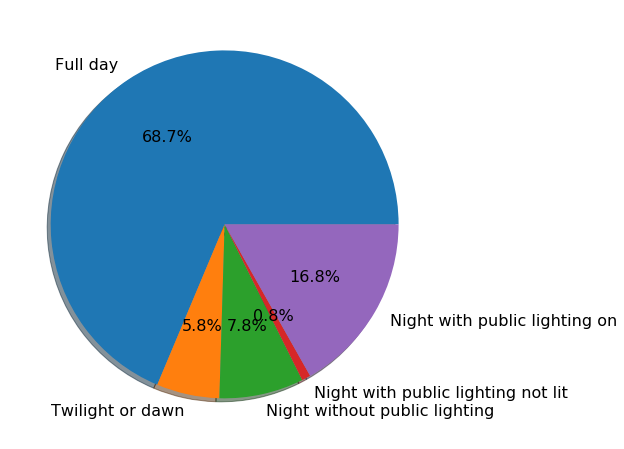

In [18]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 16})

x, y = np.unique(df_charact['Light_Conditions'], return_counts=True)
plt.figure(figsize=(10, 8))
plt.pie(y, labels=['Full day', 'Twilight or dawn', 'Night without public lighting', 'Night with public lighting not lit',
                  'Night with public lighting on'], autopct='%1.1f%%', shadow=True)
plt.show()

Выходит, что большинство аварий происходит днем.

### Верно ли, что аварии чаще происходит на перекрестках?

    1 - Out of intersection
    2 - Intersection in X
    3 - Intersection in T
    4 - Intersection in Y
    5 - Intersection with more than 4 branches
    6 - Giratory
    7 - Place
    8 - Level crossing
    9 - Other intersection


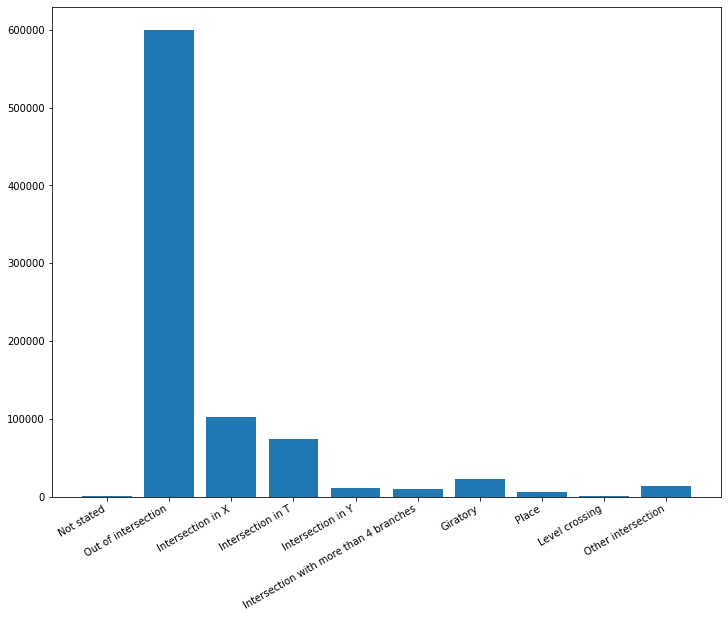

In [19]:
df_charact.dropna()
x, y = np.unique(df_charact['Intersection'], return_counts=True)
type_of_int = { 0: 'Not stated',
               1: 'Out of intersection',
               2:'Intersection in X',
               3: 'Intersection in T',
               4: 'Intersection in Y',
               5: 'Intersection with more than 4 branches',
               6: 'Giratory',
               7: 'Place',
               8: 'Level crossing',
               9: 'Other intersection'}

plt.figure(figsize=(12, 10))
plt.bar(list(type_of_int.values()), y)
plt.gcf().autofmt_xdate()
plt.show()


Оказывается, нет. На простых дорогах аварий даже больше. 
<br>Впрочем, среди всех типов пересечений, наибольшее число аварий именно на классическом перекрестке (в форме +)

### Может, атмосферные условия влияют сильнее? Область видимости весьма существенный фактор, на мой взгляд <br>
    
    1 - Normal
    2 - Light rain
    3 - Heavy rain
    4 - Snow - hail
    5 - Fog - smoke
    6 - Strong wind - storm
    7 - Dazzling weather
    8 - Cloudy weather
    9 - Other


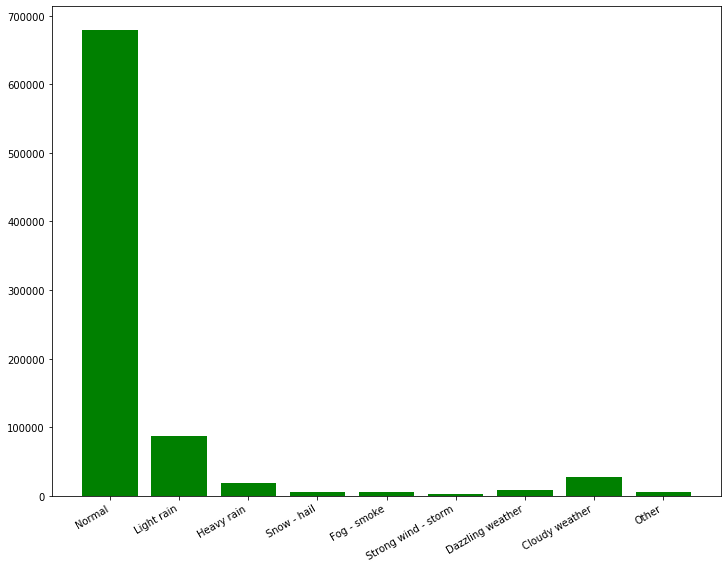

In [20]:
x, y = np.unique(df_charact['Atmosphere_Condition'], return_counts=True)
weather = {1: 'Normal',
           2: 'Light rain',
           3: 'Heavy rain',
           4: 'Snow - hail',
           5: 'Fog - smoke',
           6: 'Strong wind - storm',
           7: 'Dazzling weather',
           8: 'Cloudy weather',
           9: 'Other'}
plt.figure(figsize=(12, 10))
plt.bar(list(weather.values()), y, color='green')
plt.gcf().autofmt_xdate()
plt.show()


И снова наблюдаем, что большинство аварий происходит при нормальных погодных условиях. <br>
Среди "плохой" погоды лидирует дождь. В то же время снег и туман влияет на кол-во аварий в меньшей степени

### А как влияет состояние дороги?
    1 - normal
    2 - wet
    3 - puddles
    4 - flooded
    5 - snow
    6 - mud
    7 - icy
    8 - fat - oil
    9 - other


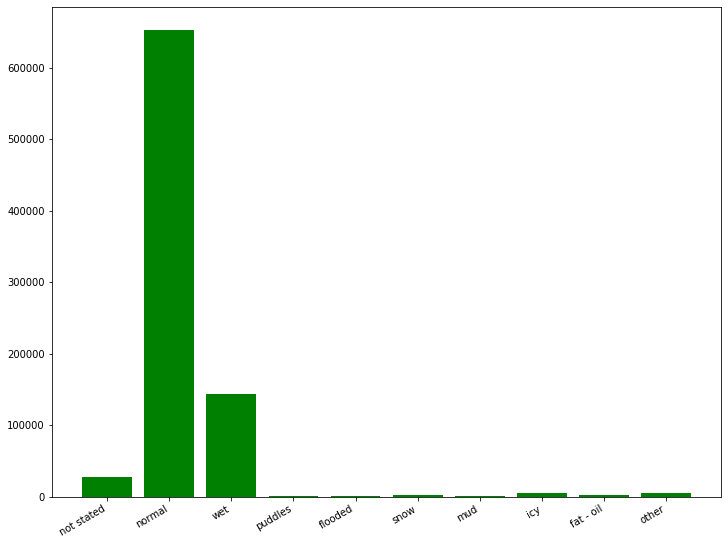

In [21]:
x, y = np.unique(df_charact['Surface_Conditions'], return_counts=True)
surf = {0: 'not stated',
        1: 'normal',
       2: 'wet',
       3: 'puddles',
       4: 'flooded',
       5: 'snow',
       6: 'mud',
       7: 'icy',
       8: 'fat - oil',
       9: 'other'}
plt.figure(figsize=(12, 10))
plt.bar(list(surf.values()), y, color='green')
plt.gcf().autofmt_xdate()
plt.show()

Мокрая дорога и правда увеличивает риск попасть в дтп, судя по графику, однако большинство аварий происходит опять же при нормальных условиях

#### Рассмотрим, как количество происшествий менялось относительно временных переменных:

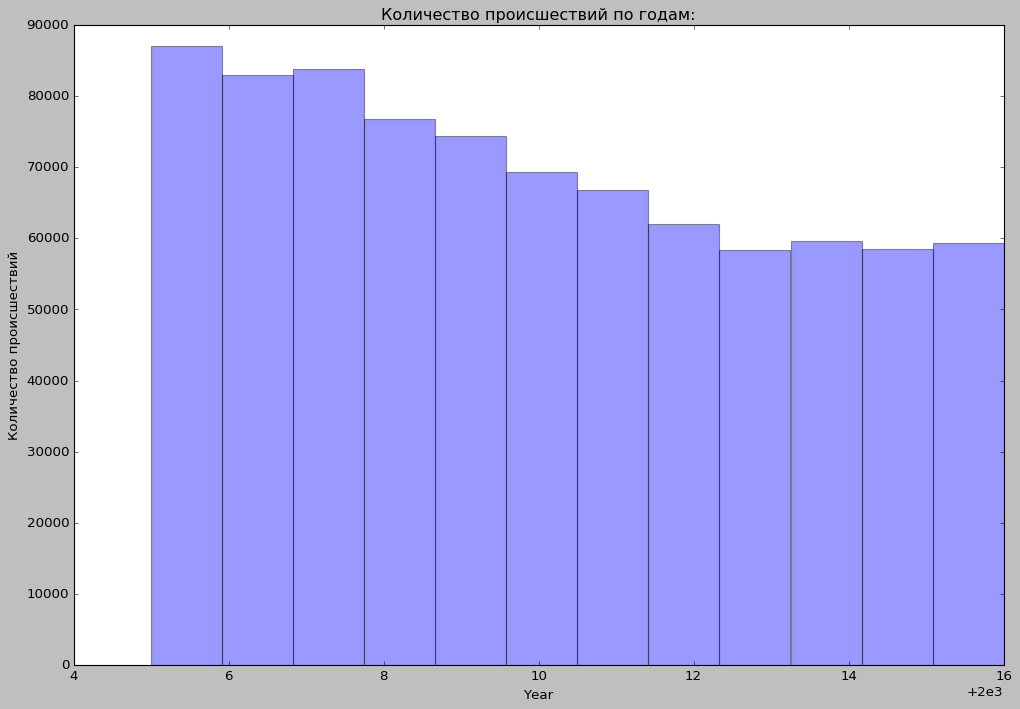

In [22]:
plt.style.use('classic')
plt.figure(figsize=(15, 10))
plt.title('Количество происшествий по годам:')
plt.xlabel('Год')
plt.ylabel('Количество происшествий')
sns.distplot(df_charact.Year, bins=12, kde=False)
plt.show()

Посмотрим на количество происшествий по дням года, красными линиями отметим праздники. <br>
В разные годы праздники сдвигались на 1-2 дня в разные стороны, поэтому некоторые красные линии заметно жирнее (это несколько линий рядом), но общей картины это не поменяет

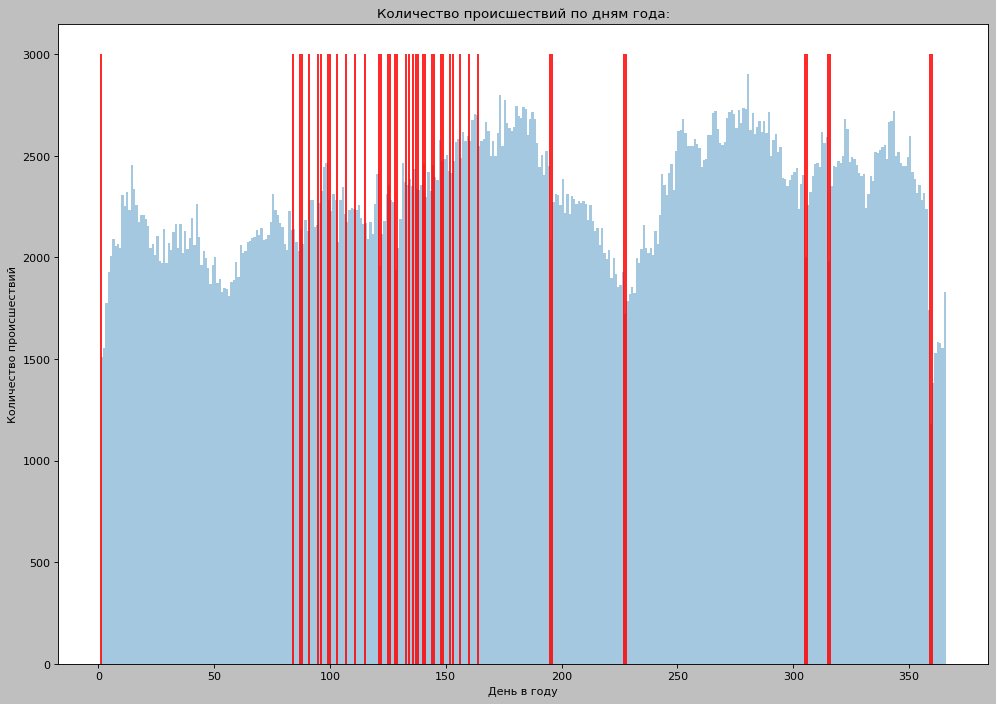

In [23]:
plt.figure(figsize=(15, 10))
plt.style.use('default')

sns.distplot(df_charact['Date'].dt.dayofyear, bins=365, kde=False)
holiday = np.unique(df_holidays['Date'].dt.dayofyear)
plt.vlines(holiday, ymin=0, ymax=3000, color='red')
plt.title('Количество происшествий по дням года:')
plt.xlabel('День в году')
plt.ylabel('Количество происшествий')

plt.show()

Казалось бы, совсем явной корелляции нет, местами даже кажется, что в праздничные дни происшествий меньше

Посмотрим, что с распределением происшествий по месяцам:

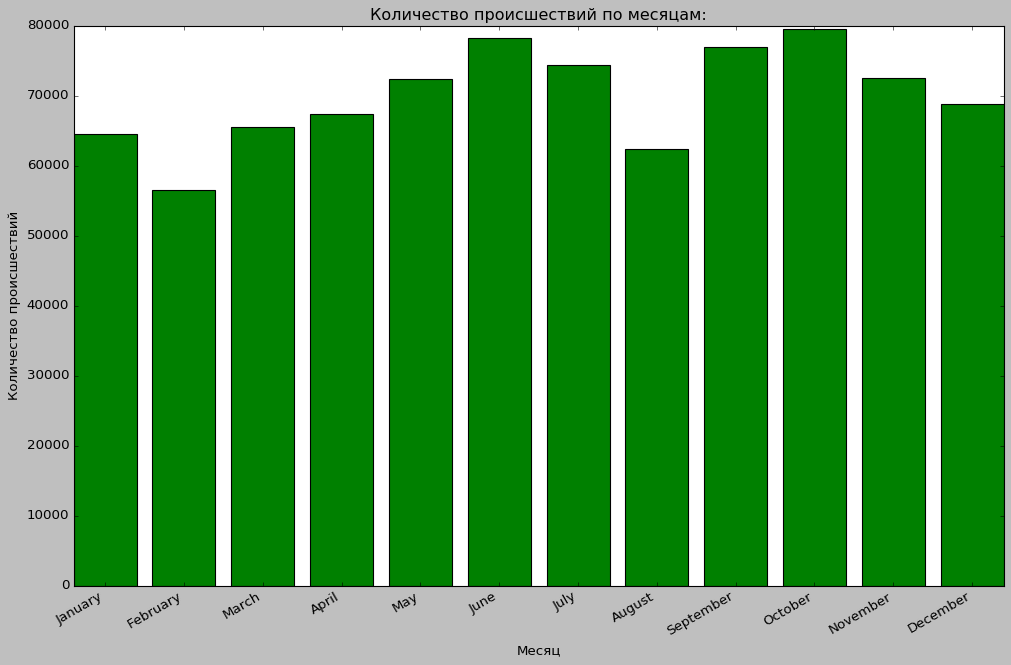

In [24]:
import calendar
plt.style.use('classic')
plt.figure(figsize=(15, 10))
plt.title('Количество происшествий по месяцам:')
plt.ylabel('Количество происшествий')
plt.xlabel('Месяц')
x, y = np.unique(df_charact['Month'], return_counts=True)
x = list(calendar.month_name[m] for m in x)
plt.bar(x, y, color='green')
plt.gcf().autofmt_xdate()
plt.show()

Больше всего происшествий в сентябре-октябре и июне-июле. <br>
Предположу, что погода в октябре наиболее дождливая, а мокрая дорога ведет к авариям. <br>
Но что происходит в июле? Наплыв туристов, видимо..

Теперь сравним по дням недели:

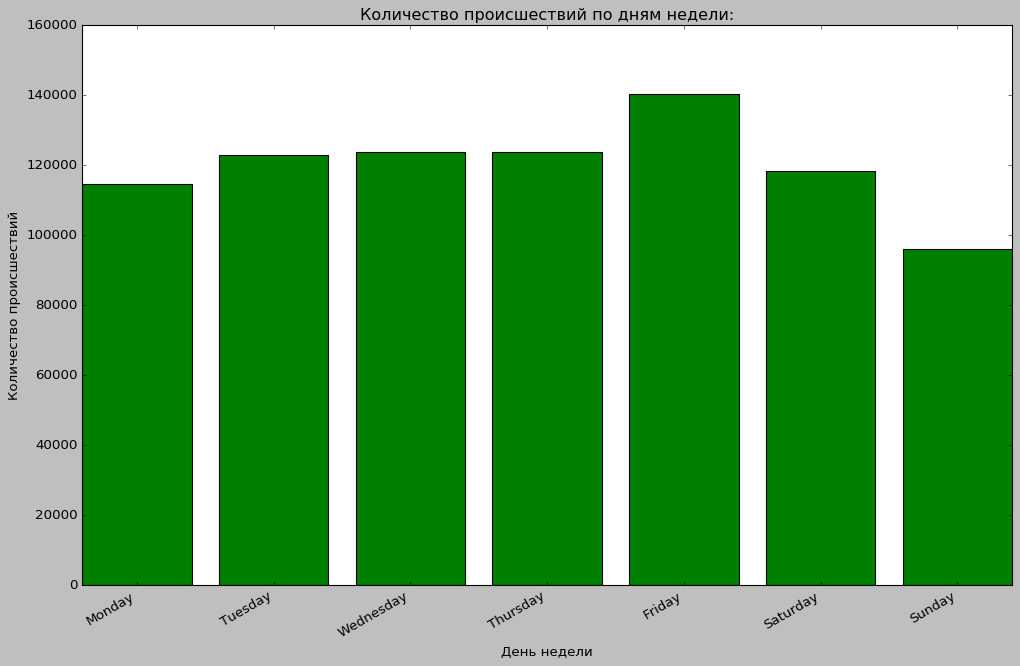

In [25]:
plt.style.use('classic')
plt.figure(figsize=(15, 10))
plt.title('Количество происшествий по дням недели:')
plt.ylabel('Количество происшествий')
plt.xlabel('День недели')
x, y = np.unique(df_charact['Date'].dt.dayofweek, return_counts=True)
x = list(calendar.day_name[m] for m in x)
plt.bar(x, y, color='green')
plt.gcf().autofmt_xdate()
plt.show()

Видим, что больше всего происшествий приходилось на пятницу: <br>
как раз перед началом выходных

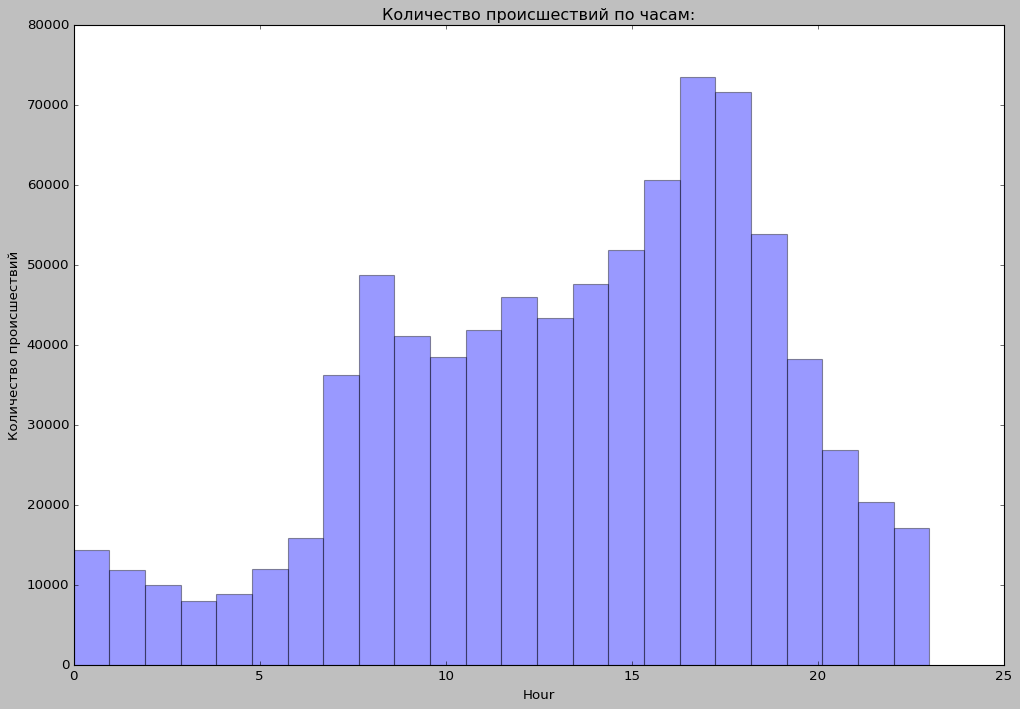

In [26]:
plt.style.use('classic')
plt.figure(figsize=(15, 10))
plt.title('Количество происшествий по часам:')
plt.ylabel('Количество происшествий')
plt.xlabel('Номер часа')
sns.distplot(df_charact['Hour'], bins=24, kde=False)
plt.show()

График показывает, что самые опасные часы - 7-9 утра и 17-19 вечера, т.е. когда большинство едет/возвращается на работу/с работы.

Рассмотрим временной ряд - количество происшествий за каждый день. <br>
В графиках выше мы уже заметили некую сезонность в данных (происшествий больше в определенные часы/дни/месяцы)

/home/rodion/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


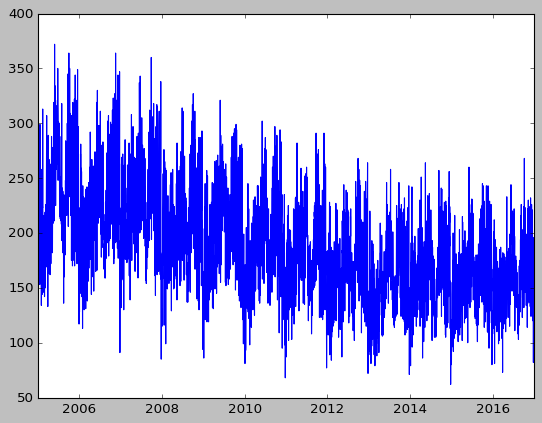

In [27]:
df_charact['Date']
df_charact_sorted = df_charact.sort_values(by='Date')
df_charact_sorted
#timeser_data = pd.DataFrame(df_charact_sorted.groupby('Date').count())
#plt.plot(df_charact_sorted.groupby('Date')['ID'].count())
timeser_data = df_charact_sorted.groupby('Date', as_index=False)['ID'].count()
#sns.tsplot(df_charact_sorted.groupby('Date')['ID'].count())
timeser_data.rename(columns={'ID': 'Count'}, inplace=True)
plt.plot(timeser_data['Date'], timeser_data['Count'])
plt.show()

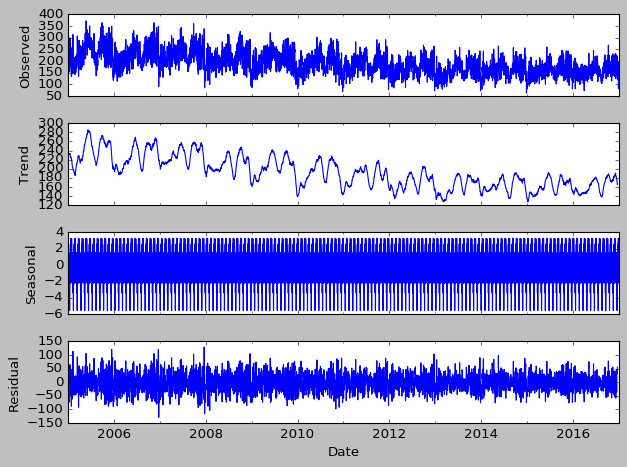

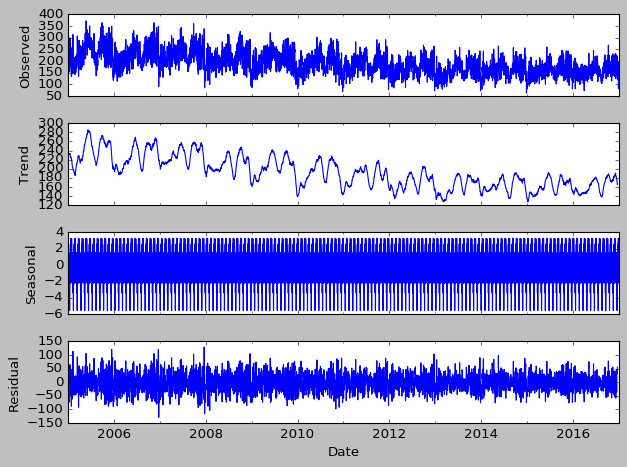

In [28]:
import statsmodels.api as sm
timeser_data.index = timeser_data.Date
timeser_data
result = sm.tsa.seasonal_decompose(timeser_data['Count'], model='additive', freq=30)
result.plot()

# Проверка статистических гипотез

Проверим стационарность временного ряда тестом Дики-Фуллера:

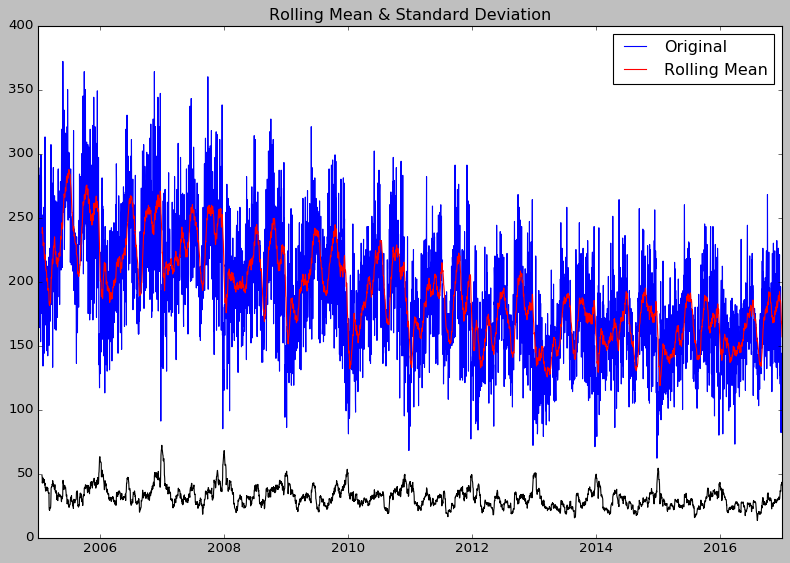

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                   -4.819235
p-value                           0.000050
#Lags Used                       30.000000
Number of Observations Used    4352.000000
Critical Value (1%)              -3.431853
Critical Value (5%)              -2.862204
Critical Value (10%)             -2.567124
dtype: float64


In [29]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 24, cutoff = 0.05):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.values,autolag='AIC' )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)
timeser_data.index = timeser_data.Date
test_stationarity(timeser_data['Count'])

Как и предполагалось, ряд стационарен. В целом число происшествий не меняется со временем (хотя по графику число аварий за последние годы меньше)

#### Интересно узнать, какого возраста участники ДТП, а именно - водители. Верно ли, что люди постарше более аккуратны на дорогах, а те, кому слегка за двадцать - основные виновники аварий?

In [30]:
df_users = df_users.drop_duplicates()
df_users = df_users.dropna(axis=0)
df_users

,ID,Role,Severity,Birth_Year,Pedestrian_Location,Safety,Year,Age
0,201600000001,1,1,1983.0,0.0,11.0,2016,33.0
1,201600000001,1,3,2001.0,0.0,21.0,2016,15.0
2,201600000002,1,3,1960.0,0.0,11.0,2016,56.0
3,201600000002,2,3,2000.0,0.0,11.0,2016,16.0
4,201600000002,2,3,1962.0,0.0,11.0,2016,54.0
...,...,...,...,...,...,...,...,...
1875884,200500087953,1,1,1972.0,0.0,13.0,2005,33.0
1875885,200500087953,1,1,1965.0,0.0,13.0,2005,40.0
1875886,200500087953,1,4,1990.0,0.0,23.0,2005,15.0
1875887,200500087954,1,4,1951.0,0.0,13.0,2005,54.0


In [31]:
drivers_by_age = df_users[df_users['Role'] == 1]['Age']
drivers_by_age = np.array(drivers_by_age)
drivers_by_age

array([33., 15., 56., ..., 40., 15., 54.])

Посмотрим на распределение:

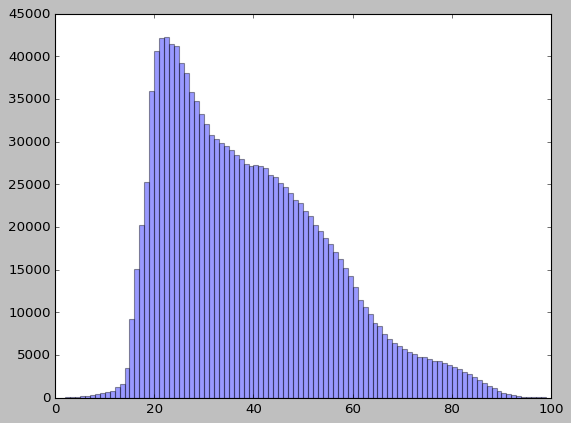

In [32]:
sns.distplot(drivers_by_age, bins=range(1, 100), kde=False)
plt.show()

Похоже на нормальное распределение, смещенное влево. Возраст в данном случае - количественный признак. Проверим распределение на нормальность критерием Шапиро-Уилка <br>
<b>H0:</b> распределение нормальное <br>
<b>H1:</b> иначе

In [33]:
stats.shapiro(drivers_by_age[:5000])

(0.9492917656898499, 1.8062805868771644e-38)

Похоже, что нет <br>
Посмотрим на еще один тест из модуля stats:

In [34]:
k, p = stats.normaltest(drivers_by_age[:5000])
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


Наблюдений больше 5000, (из интереса) попробуем критерий Колмогорова-Смирнова для всей выборки:

In [35]:
stats.kstest(drivers_by_age, 'norm')

KstestResult(statistic=0.9999064598124209, pvalue=0.0)

pvalue - вероятность увидеть такие значения статистики при условии, что гипотеза H0 - верна

Что ж, распределение не является нормальным. Значит, будем использовать непараметрические критерии...

In [36]:
np.median(drivers_by_age), np.mean(drivers_by_age)

(36.0, 38.58755570902891)

Гипотеза: <br> (на основе данной совокупности проверим верно ли это для генеральной совокупности) <br>
H0: средний возраст водителей в ДТП - 38 лет <br>
H1: средний возраст водителей в ДТП не равен 38 лет

(Уменьшим объем выборки)

In [37]:
drivers_by_age[::1000].shape

(1391,)

In [38]:
stats.wilcoxon(drivers_by_age[::1000] - 38)

WilcoxonResult(statistic=451901.0, pvalue=0.37534558342894875)

Принимаем гипотезу. Т.е. выборочное среднее равно среднему по генеральной совокупности. Выходит, наше предположение о том, что водители чуть старше двадцати, неверно.

##### Проверим, как связаны между собой положение пешехода (вне перехода/на пеш. переходе) и летальность происшествия <br>
<b>H0:</b> доли сбитых насмерть пешеходов на переходе и не на переходе равны <br>
<b>H1:</b> -//- не равны <br>
locp: Location of the pedestrian:
On pavement:

    1 - A + 50 m from the pedestrian crossing
    2 - A - 50 m from the pedestrian crossing

On pedestrian crossing:

    3 - Without light signaling
    4 - With light signaling

Various:

    5 - On the sidewalk
    6 - On the verge
    7 - On refuge or BAU
    8 - On against aisle


In [39]:
df_users['Pedestrian_Location'].isna().sum()

0

In [40]:
#пешеходы, которые были НЕ на пешеходном переходе в момент аварии
out_of_ped_crossing = df_users[(df_users['Pedestrian_Location'] >= 1) & (df_users['Pedestrian_Location'] <= 2)]
all_out_of_ped_crossing = out_of_ped_crossing.shape[0]

#пешеходы, которые были на пешеходном переходе в момент аварии
on_ped_crossing = df_users[(df_users['Pedestrian_Location'] >= 3) & (df_users['Pedestrian_Location'] <= 4)]
all_on_ped_crossing = on_ped_crossing.shape[0]

#пешеходы, которые были НЕ на пешеходном переходе, сбитые насмерть
killed_out_of_ped_crossing = out_of_ped_crossing[out_of_ped_crossing['Severity'] == 2].shape[0]
#пешеходы, которые были на пешеходном переходе, сбитые насмерть
killed_on_ped_crossing = on_ped_crossing[on_ped_crossing['Severity'] == 2].shape[0]

all_on_ped_crossing, all_out_of_ped_crossing, killed_on_ped_crossing, killed_out_of_ped_crossing

ped_cross_df = pd.DataFrame([(killed_on_ped_crossing, killed_out_of_ped_crossing),
                  (all_on_ped_crossing, all_out_of_ped_crossing)], 
             index=['Погибли', 'Всего'],
             columns=['На пешеходном переходе', 'НЕ на перешеходном переходе'])
ped_cross_df

,На пешеходном переходе,НЕ на перешеходном переходе
Погибли,1144,1990
Всего,49238,42505


Проверим, действительно ли ztest делает то, что мы хотим

In [41]:
p1 = killed_out_of_ped_crossing / all_out_of_ped_crossing
p2 = killed_on_ped_crossing / all_on_ped_crossing
n1 = all_out_of_ped_crossing
n2 = all_on_ped_crossing
p = (killed_on_ped_crossing + killed_out_of_ped_crossing) / (all_on_ped_crossing + all_out_of_ped_crossing)

In [42]:
#Проверяем правомерность применимости критерия z для доли
p * n1 > 5, p * n2 > 5

(True, True)

Посчитаем вручную

In [43]:
z = (p1 - p2) / (np.sqrt(p * (1 - p) * (1 / n1 + 1 / n2)))
z

19.610312594295998

А теперь с помощью модуля statsmodels

In [44]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest([killed_out_of_ped_crossing, killed_on_ped_crossing],
                  [all_out_of_ped_crossing, all_on_ped_crossing])

(19.610312594295998, 1.2625358714670452e-85)

Отвергаем нулевую гипотезу о том, что доли равны. <br>
Т.е. вероятность быть сбитым насмерть переходя дорогу НЕ на пешеходном переходе, выше

Попробуем теперь критерий Хи-Квадрат для той же гипотезы

In [45]:
#Наблюдаемая таблица сопряженности
observed = [[killed_on_ped_crossing, all_on_ped_crossing - killed_on_ped_crossing],
           [killed_out_of_ped_crossing, all_out_of_ped_crossing - killed_out_of_ped_crossing]]

#Доля сбитых насмерть и на переходах и вне переходов
percent_killed = (killed_out_of_ped_crossing + killed_on_ped_crossing) / \
                (all_out_of_ped_crossing + all_on_ped_crossing)
#Расчитываем ожидаемое число (примем нулевую гипотезу о том, что риск быть сбитым не зависит от места перехода)
expected_on_ped_crossing = percent_killed * all_on_ped_crossing
expected_out_of_ped_crossing = percent_killed * all_out_of_ped_crossing

expected = [[expected_on_ped_crossing, all_on_ped_crossing - expected_on_ped_crossing],
            [expected_out_of_ped_crossing, all_out_of_ped_crossing - expected_out_of_ped_crossing]]
print(observed)
print(expected)

[[1144, 48094], [1990, 40515]]
[[1682.0018094023521, 47555.998190597646], [1451.9981905976479, 41053.001809402354]]


In [46]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
chisquare(observed)
chi2_contingency(observed)

(383.84989096240923,
 1.8063023503566103e-85,
 1,
 array([[ 1682.0018094, 47555.9981906],
        [ 1451.9981906, 41053.0018094]]))

p-value близко к нулю, значит отвергаем нулевую гипотезу о том, что рассматриваемые доли одинаковы, т.е. различия в группах статистически значимы

### Проверим, отличаются ли доли погибших в ДТП среди пристегнутых водителей и не пристегнутых:

$Safety:$ <br>
- 11 - пристегнутые ремнем безопасности
- 12 - не пристегнутые ремнем безопасности <br>


In [47]:
have_belt_use_belt = df_users[(df_users['Safety'] == 11) & (df_users['Role'] == 2)]
have_belt_not_use_belt = df_users[(df_users['Safety'] == 12) & (df_users['Role'] == 2)]

killed_have_belt_use_belt = have_belt_use_belt[have_belt_use_belt['Severity'] == 2]
killed_have_belt_not_use_belt = have_belt_not_use_belt[have_belt_not_use_belt['Severity'] == 2]

p1 = killed_have_belt_use_belt.shape[0] / have_belt_use_belt.shape[0]
p2 = killed_have_belt_not_use_belt.shape[0] / have_belt_not_use_belt.shape[0]
p = (killed_have_belt_use_belt.shape[0] + killed_have_belt_not_use_belt.shape[0]) /\
        (have_belt_use_belt.shape[0] + have_belt_not_use_belt.shape[0])
(p * have_belt_use_belt.shape[0] > 5, p * have_belt_not_use_belt.shape[0] > 5)

(True, True)

In [48]:
belt_df = pd.DataFrame([(killed_have_belt_use_belt.shape[0], killed_have_belt_not_use_belt.shape[0]),
                  (have_belt_use_belt.shape[0], have_belt_not_use_belt.shape[0])], 
             index=['Погибли', 'Всего'],
             columns=['Пристегивались', 'Не пристегивались'])
belt_df


,Пристегивались,Не пристегивались
Погибли,4728,1550
Всего,201797,12401


In [49]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest([killed_have_belt_use_belt.shape[0], killed_have_belt_not_use_belt.shape[0]],
                  [have_belt_use_belt.shape[0], have_belt_not_use_belt.shape[0]])

(-65.08174243904035, 0.0)

#### Отвергаем нулевую гипотезу о равенстве долей, т.е. различия в доле погибших среди не пристегнутых и пристегнутых статистически знамчимы

# Предсказание временного ряда

Сделаем предсказание на 2016-ый год по предыдущим двум годам (2014-2015) c помощью экспоненциального сглаживания:

In [50]:
train = timeser_data[(timeser_data['Date'].dt.year >= 2014) & (timeser_data['Date'].dt.year <= 2015)]
test = timeser_data[timeser_data['Date'].dt.year >= 2016]
train.shape, test.shape
#train = train.resample('W', how='mean')
#test = test.resample('W', how='mean')
train.shape, test.shape

((730, 2), (366, 2))

In [51]:
from statsmodels.tsa.api import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Count'])).fit()
#model.forecast(0)
#prediction = model.forecast(len(test))
prediction = model.predict(start=0, end=test.shape[0] - 1)
prediction.shape

(366,)

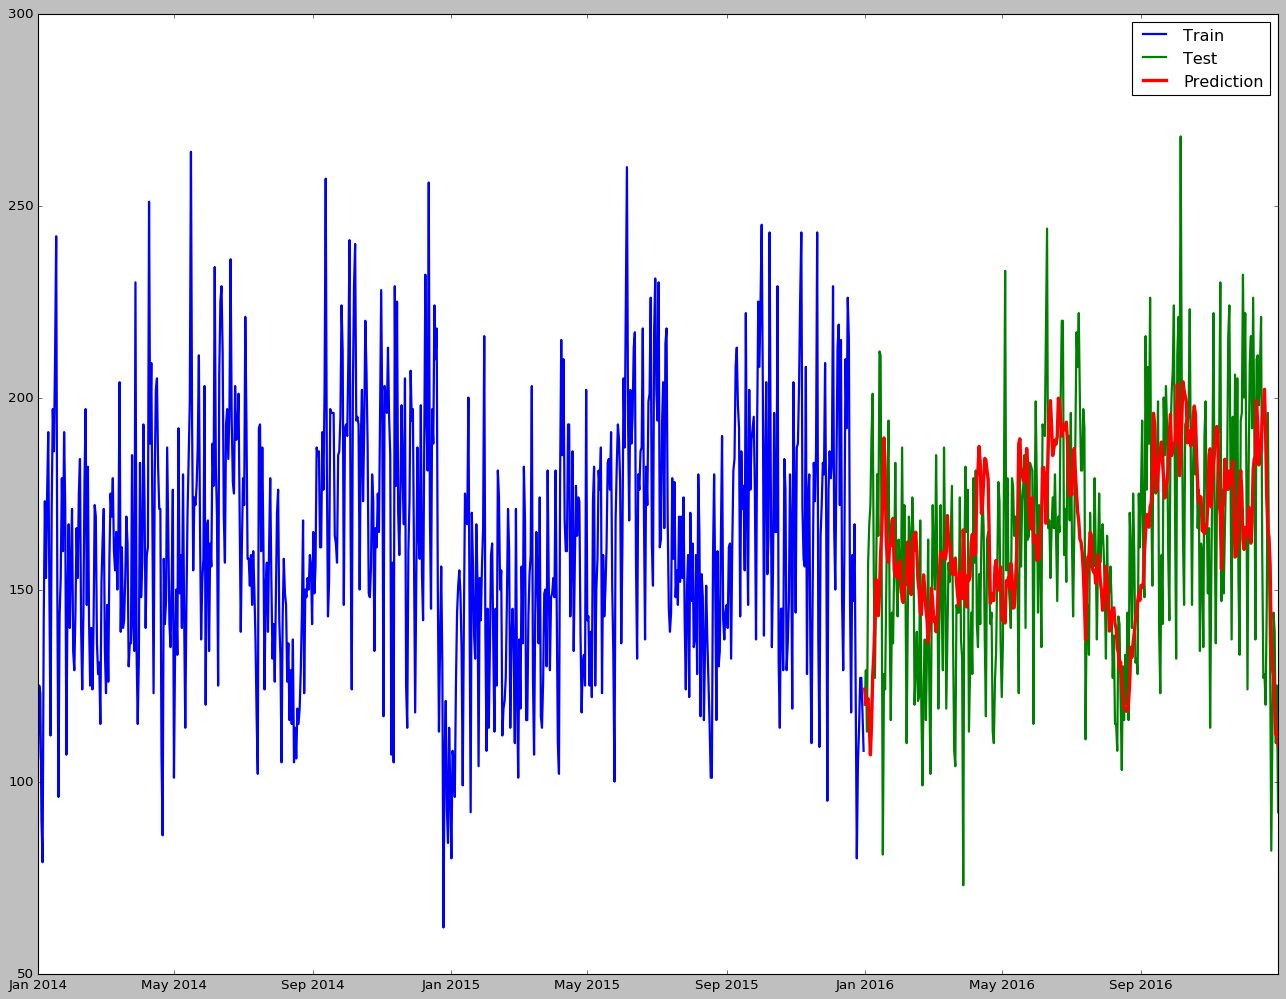

In [52]:
plt.figure(figsize=(20, 15))
plt.plot(train['Date'], train['Count'], label='Train', linewidth=2)
plt.plot(test['Date'], test['Count'], label='Test', linewidth=2)
plt.plot(test['Date'], prediction, label='Prediction', linewidth=3)
plt.legend(loc='upper right')
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
error1 = sqrt(mean_squared_error(test.Count, prediction))
error2 = sqrt(mean_absolute_error(test.Count, prediction))
error1, error2

(29.90128627012385, 4.846497557149323)

Попробуем также воспользоваться frprophet. Библиотека умеет учитывать праздники, но у них колонка даты должна называться 'ds'. В предыдущих ячейках мы убрали названия праздников, поэтому загрузим таблицу заново и переименуем столбцы

In [54]:
df_holidays = pd.read_csv('accidents-in-france-from-2005-to-2016/holidays.csv', low_memory = False, encoding = 'latin-1')
df_holidays.rename(columns={'ds': 'Date'}, inplace=True)
df_holidays['Date'] = pd.to_datetime(df_holidays['Date'])


In [55]:
from fbprophet import Prophet

df_holidays.rename(columns={'Date': 'ds'}, inplace=True)
model = Prophet(holidays=df_holidays, yearly_seasonality=True , weekly_seasonality=True, daily_seasonality=False)

train , test = timeser_data[(timeser_data['Date'].dt.year >= 2014) & \
                            (timeser_data['Date'].dt.year <= 2015)],\
                timeser_data[timeser_data['Date'].dt.year >= 2016]

#prophet требует чтобы столбцы назвались 'ds' - дата и 'y' - целевая переменная
train.rename(columns={'Date': 'ds', 'Count': 'y'}, inplace=True)
test.rename(columns={'Date': 'ds', 'Count': 'y'}, inplace=True)

model.fit(train)

prediction = model.predict(test)['yhat'].round()
prediction.shape


ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
/home/rodion/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


(366,)

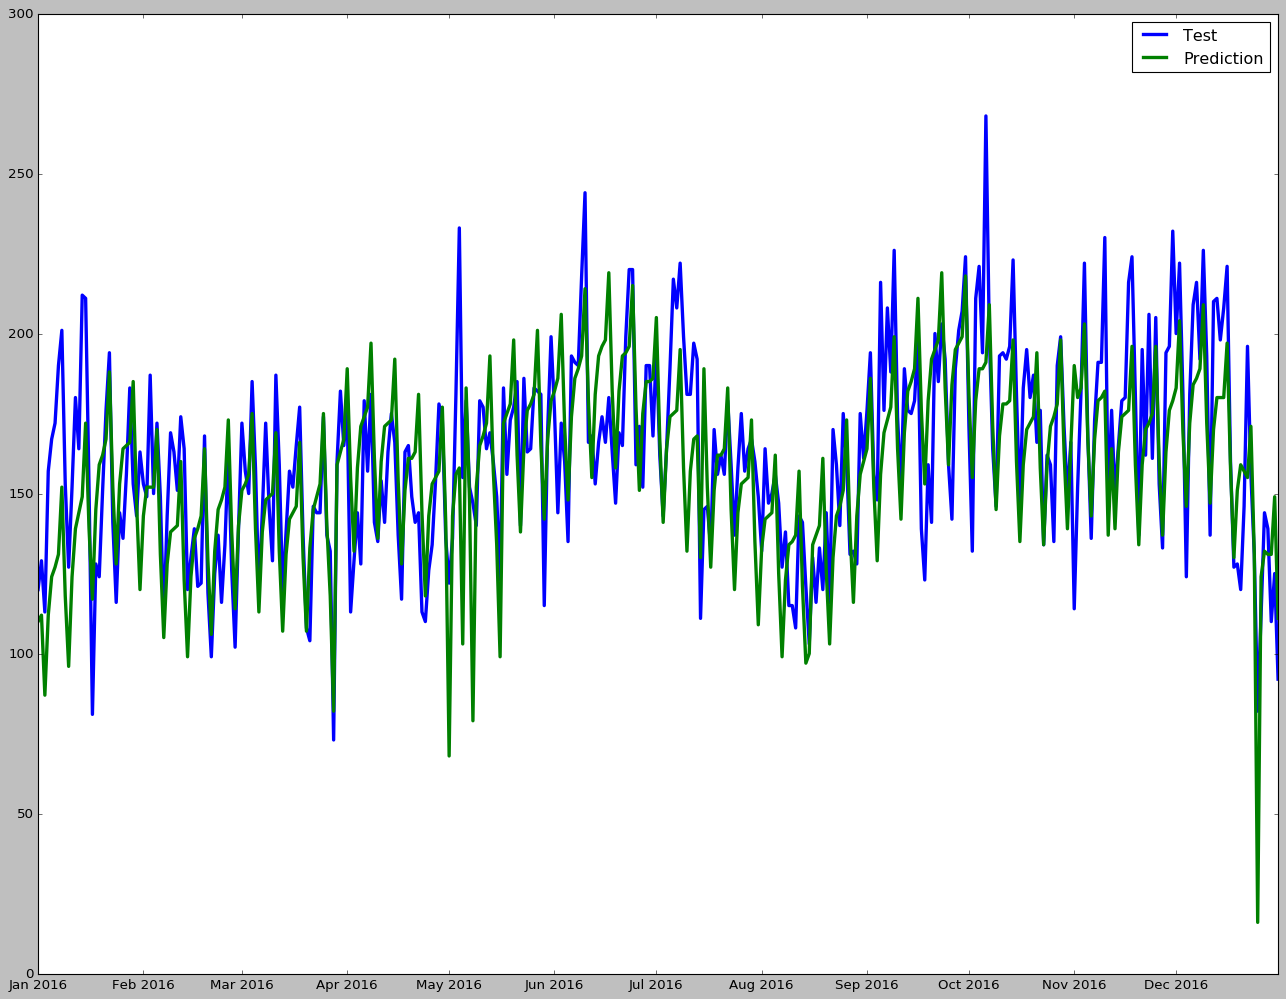

In [56]:
plt.figure(figsize=(20, 15))
#plt.plot(histo['ds'], histo['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test', linewidth=3)
plt.plot(test['ds'], prediction, label='Prediction', linewidth=3)
plt.legend(loc='upper right')
plt.show()

In [57]:
error1 = sqrt(mean_squared_error(prediction, test['y']))
error2 = mean_absolute_error(prediction, test['y'])
error1, error2

(22.745923792634315, 17.743169398907103)

# Выводы о проделанном исследовании

1. Количество дорожных происшествий имеет сезонный характер
2. Временной ряд стационарен. Благодаря сезонности и стационарности мы смогли выявить тенденции ряда и предсказать количество происшествий на последний год довольно точно.
3. Погодные, дорожные, атмосферные условия оказывают влияение на кол-во инцидентов, но все же большинство аварий происходит в хорошую погоду и при хороших условиях
4. Наиболее сильно количество инцидентов зависит от временных характеристик: в летние месяцы, особенно июль, т.е. в туристический сезон и октябрь наблюдается наибольшее число аварий. Также, самыми опасными часами являются часы наибольшей загруженности транспорта, когда люди в пути на работу (с работы) <br>
5. Переходить дорогу стоит на пешеходном переходе: доля летальных исходов среди пешеходов, переходивших дорогу не на переходе, выше, и это статистически значимо! <br>
6. Водителям за рулем обязательно следует пристегиваться: доли погибших автомобилистов среди притегнутых и не пристегнутых статистически значимо отличаются. <br>
##### Таким образом, как показывает статистика, в авариях виноваты сами люди. Лично мне кажется, что дело скорее не в неосторожности, а в усталости. Отсюда и такая заметная связь со временем, т.к. бодрость/усталость человека зависит от времени суток.